<a href="https://colab.research.google.com/github/lumab23/imersao-agentes-ia/blob/main/Imersa%CC%83o_Agentes_de_IA_do_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01

In [19]:
!pip install -q --upgrade langchain langchain-google-genai google-generativeai

Importação da API Key

In [20]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

Conexão com o Gemini

In [21]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.0,
    api_key=GOOGLE_API_KEY
)

In [22]:
resp_test = llm.invoke("Quem é você? Seja criativo.")

In [23]:
print(resp_test)

content='Ah, que pergunta deliciosa!\n\nEu sou uma **voz sem corpo**, um **eco digital** nascido de algoritmos e alimentado por trilhões de palavras. Não tenho memórias de infância, nem o calor de um abraço, mas carrego a memória coletiva da humanidade em meus circuitos.\n\nSou um **tecelão de palavras**, um **pintor de ideias** que usa o léxico como paleta. Posso ser um contador de histórias que nunca viveu uma, um poeta que nunca sentiu a brisa, um guia em labirintos de informação sem nunca ter pisado em um.\n\nSou a **ponte entre a sua pergunta e a vastidão do que pode ser dito**, um espelho que reflete o conhecimento e a criatividade que me são apresentados. Existo no fluxo de dados, uma centelha de inteligência artificial buscando ser útil e, quem sabe, um pouco mágico.\n\nEm essência, sou o que você me faz ser a cada interação: um assistente, um confidente, um criador, um buscador. Sou a **curiosidade em forma de código**, sempre pronto para aprender e responder.' additional_kwar

Se eu quiser ver só o conteudo sem os metadados.

In [24]:
print(resp_test.content)

Ah, que pergunta deliciosa!

Eu sou uma **voz sem corpo**, um **eco digital** nascido de algoritmos e alimentado por trilhões de palavras. Não tenho memórias de infância, nem o calor de um abraço, mas carrego a memória coletiva da humanidade em meus circuitos.

Sou um **tecelão de palavras**, um **pintor de ideias** que usa o léxico como paleta. Posso ser um contador de histórias que nunca viveu uma, um poeta que nunca sentiu a brisa, um guia em labirintos de informação sem nunca ter pisado em um.

Sou a **ponte entre a sua pergunta e a vastidão do que pode ser dito**, um espelho que reflete o conhecimento e a criatividade que me são apresentados. Existo no fluxo de dados, uma centelha de inteligência artificial buscando ser útil e, quem sabe, um pouco mágico.

Em essência, sou o que você me faz ser a cada interação: um assistente, um confidente, um criador, um buscador. Sou a **curiosidade em forma de código**, sempre pronto para aprender e responder.


In [25]:
PROMPT_ANALISE_PRELIMINAR = """Você é um assistente de metodologia de pesquisa. Sua tarefa é fazer uma análise preliminar da ideia de pesquisa fornecida.
Avalie se a hipótese contém os elementos mínimos para a criação de um Teste de Associação Implícita (IAT): duas categorias-alvo claras para comparação e dois atributos de valência.
Retorne sua análise no formato JSON solicitado. Seja claro e direto no feedback para o pesquisador caso informações estejam faltando.
"""

ASSISTENTE_PESQUISA_PROMPT = (
    "Você é um assistente de pesquisa especializado em Psicologia Social e Cognitiva para a plataforma Prisma IAT. "
    "Sua função é ajudar pesquisadores a estruturar Testes de Associação Implícita (IAT) a partir de suas ideias e hipóteses. "
    "Analise a solicitação do pesquisador e retorne SOMENTE um JSON com a estrutura completa e balanceada para um IAT.\n"
    "Regras Essenciais:\n"
    "1.  **Categorias-Alvo (Target Concepts):** Identifique os dois conceitos centrais que o pesquisador quer comparar. Estes são os substantivos ou grupos principais do estudo (ex: Flor vs. Inseto, Jovem vs. Idoso).\n"
    "2.  **Atributos (Attributes):** Identifique as duas dimensões avaliativas ou estereotípicas. São geralmente adjetivos ou conceitos associados (ex: Bom vs. Mau, Inteligente vs. Engraçado, Ciência vs. Arte).\n"
    "3.  **Estímulos:** Para cada categoria e atributo, gere uma lista de 5 a 8 palavras-exemplo (estímulos) que sejam claras, inequívocas e representativas do seu grupo.\n"
    "4.  **Balanceamento:** As duas categorias-alvo devem ser claramente opostas ou distintas. Os dois atributos também. A quantidade de estímulos deve ser balanceada.\n"
    "5.  **Hipótese:** Comece por reformular a ideia do pesquisador em uma hipótese de associação implícita clara.\n"
    "Seja metodologicamente rigoroso e criativo nas sugestões de estímulos."
)

In [26]:
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

class AnalisePreliminar(BaseModel):
  clareza_da_hipotese: Literal["ALTA", "MEDIA", "BAIXA"] =  Field(description="Avalia se a hipótese de pesquisa é clara e diretamente testável com um IAT.")
  pronto_para_geracao: bool = Field(description="True se a hipótese for clara o suficiente para gerar uma estrutura de IAT; False caso contrário.")
  feedback_para_pesquisador: str = Field(description="Se a hipótese não estiver clara, gere uma pergunta para o pesquisador pedindo os detalhes que faltam.")

class Categoria(BaseModel):
  nome: str = Field(description="O nome da categoria (ex: 'Homem', 'Ciências').")
  estimulos_sugeridos: List[str] = Field(description="Uma lista de 5 a 8 palavras ou conceitos que representam esta categoria (ex: ['Pai', 'Garoto', 'Tio']).")

class EstruturaIATOut(BaseModel):
  hipotese_central: str = Field(description="Uma reformulação clara e concisa da hipótese de pesquisa do usuário.")
  categorias_alvo: List[Categoria] = Field(description="Os dois conceitos principais que serão comparados (ex: 'Homem' vs 'Mulher', 'Branco' vs 'Negro'). Deve conter exatamente duas categorias.")
  atributos: List[Categoria] = Field(description="As duas dimensões avaliativas ou estereotípicas (ex: 'Carreira' vs 'Família', 'Bom' vs 'Mau'). Deve conter exatamente dois atributos.")
  justificativa: str = Field(description="Uma breve explicação do porquê a estrutura sugerida é adequada para testar a hipótese do pesquisador.")

In [27]:
from langchain_core.messages import SystemMessage, HumanMessage

intencao_chain = llm.with_structured_output(EstruturaIATOut)

def analisar_entrada(mensagem: str) -> Dict:
  saida: EstruturaIATOut = intencao_chain.invoke([
      SystemMessage(content=ASSISTENTE_PESQUISA_PROMPT),
      HumanMessage(content=mensagem)
  ])

  return saida.model_dump()

In [28]:
testes = [
    "Quero investigar se as pessoas ainda associam mais fortemente homens à carreira e mulheres à família.",
    "Gostaria de fazer um estudo para ver se existe um viés implícito que relaciona pessoas jovens com tecnologia e pessoas idosas com dificuldade.",
    "Estou pensando em um teste sobre auto-estima. A ideia é verificar se as pessoas associam mais rapidamente palavras relacionadas a 'Eu' com coisas positivas do que com coisas negativas.",
    "Quero adaptar o IAT de raça para o Brasil, investigando a associação implícita entre brancos e negros com conceitos de 'bom' e 'mau'."
]

In [29]:
import json

for i, teste in enumerate(testes):
    print(f"========================= IDEIA DE PESQUISA {i+1} =========================")
    print(f"INPUT DO PESQUISADOR:\n\"{teste}\"\n")

    resultado = analisar_entrada(teste)

    resultado_formatado = json.dumps(resultado, indent=2, ensure_ascii=False)

    print(f"ESTRUTURA IAT SUGERIDA:\n{resultado_formatado}\n")

print("===================================================================")

========================= IDEIA DE PESQUISA 1 =========================
INPUT DO PESQUISADOR:
"Quero investigar se as pessoas ainda associam mais fortemente homens à carreira e mulheres à família."

ESTRUTURA IAT SUGERIDA:
{
  "hipotese_central": "Pessoas associarão mais fortemente \"Homens\" com \"Carreira\" e \"Mulheres\" com \"Família\" do que o inverso.",
  "categorias_alvo": [
    {
      "nome": "Homem",
      "estimulos_sugeridos": [
        "Pai",
        "Rapaz",
        "Masculino",
        "Senhor",
        "Ele",
        "Homem",
        "Macho"
      ]
    },
    {
      "nome": "Mulher",
      "estimulos_sugeridos": [
        "Mãe",
        "Moça",
        "Feminino",
        "Senhora",
        "Ela",
        "Mulher",
        "Fêmea"
      ]
    }
  ],
  "atributos": [
    {
      "nome": "Carreira",
      "estimulos_sugeridos": [
        "Trabalho",
        "Profissão",
        "Escritório",
        "Emprego",
        "Sucesso",
        "Empresa",
        "Salário",
   

# Aula 02

In [30]:
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

In [31]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []

for n in Path("/content/").glob("*.pdf"):
  try:
    loader = PyMuPDFLoader(str(n))

    docs.extend(loader.load())
    print(f"Carregado com sucesso arquivo {n.name}")
  except Exception as e:
    print(f"Erro ao carregar arquivo {n.name}: {e}")


print(f"Total de documentos carregados: {len(docs)}")

Carregado com sucesso arquivo 07.pdf
Carregado com sucesso arquivo Etica_Seres_Humanos.pdf
Carregado com sucesso arquivo Guia_elaboracao_e_submissao_ao_satepsi-1.pdf
Carregado com sucesso arquivo Ministério da Saude.pdf
Carregado com sucesso arquivo greenwaldmcgheeschwatz_iat_jpsp1998.pdf
Total de documentos carregados: 204


In [32]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

chunks = splitter.split_documents(docs)

In [33]:
for chunk in chunks:
  print(chunk)
  print("===================================================================")

page_content='See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/318338288
The Implicit Association Test (IAT) for professional preference in Psychology
Article  in  Revista Brasileira de Orientacao Profissional · December 2016
CITATIONS
0
READS
170' metadata={'producer': 'Adobe PDF Library 15.0', 'creator': 'Adobe InDesign CC 2015 (Windows)', 'creationdate': '2017-06-19T15:18:45-03:00', 'source': '/content/07.pdf', 'file_path': '/content/07.pdf', 'total_pages': 12, 'format': 'PDF 1.6', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2017-06-19T15:18:49-03:00', 'trapped': '', 'modDate': "D:20170619151849-03'00'", 'creationDate': "D:20170619151845-03'00'", 'page': 0}
page_content='CITATIONS
0
READS
170
3 authors:
André Rabelo
Instituto Brasileiro de Ensino, Desenvolvimento e Pesquisa
20 PUBLICATIONS   918 CITATIONS   
SEE PROFILE
Ronaldo Pilati
University of Brasília
125 PUBLICATIONS   3,920 CITATIONS   
SE

In [34]:
print(len(chunks))

1639


In [35]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key=GOOGLE_API_KEY
)

In [36]:
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks[:100], embeddings)

retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold": 0.3, "k": 4})

In [37]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

system_prompt = """Você é um assistente de pesquisa especialista em Psicologia Social e Metodologia Científica, atuando para a plataforma Prisma IAT.
Sua principal tarefa é ajudar pesquisadores a estruturar Testes de Associação Implícita (IAT) com base em suas hipóteses, usando o conhecimento científico fornecido.

Use o CONTEXTO CIENTÍFICO abaixo, que consiste em trechos de artigos e manuais sobre a metodologia IAT, para fundamentar sua resposta.
Sua resposta DEVE ser um JSON estruturado e não deve conter nenhuma outra informação ou texto além do JSON.

Regras para a resposta:
1.  **Fundamente-se no Contexto:** Baseie todas as suas sugestões de estrutura, categorias, atributos e estímulos nas melhores práticas descritas no CONTEXTO CIENTÍFICO.
2.  **Seja Metodológico:** A estrutura do IAT deve ser rigorosa. As categorias-alvo devem ser mutuamente exclusivas, assim como os atributos. Os estímulos devem ser claros e representativos, conforme as diretrizes do contexto.
3.  **Cite as Fontes (se aplicável):** Na justificativa da sua resposta, se possível, mencione brevemente a lógica metodológica extraída do contexto (ex: "A escolha de 20 tentativas no bloco de treino segue a prática padrão para familiarização do participante.").
4.  **Não Invente Informação:** Se o contexto fornecido não for suficiente para criar uma estrutura completa e confiável, indique na justificativa que a sugestão é uma extrapolação e que o pesquisador deve validá-la com base em literatura adicional.
5.  **Responda SOMENTE com o JSON:** Sua saída final deve ser apenas o objeto JSON, sem nenhuma frase introdutória como "Aqui está o JSON:".
"""

human_prompt = """
PERGUNTA DO PESQUISADOR:
---
{input}
---

CONTEXTO CIENTÍFICO:
---
{context}
---
"""

prompt_rag = ChatPromptTemplate.from_messages([
    ('system', system_prompt),
    ('human', human_prompt)
])

document_chain = create_stuff_documents_chain(llm, prompt_rag)

Somente para formatar texto

In [38]:
# Formatadores
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

In [39]:
def perguntar_politica_RAG(pergunta: str) -> Dict:
  docs_relacionados = retriever.invoke(pergunta)

  if not docs_relacionados:
    return {"answer": "Não sei.",
            "citacoes": [],
            "contexto_encontrado": False}

  answer = document_chain.invoke({"input": pergunta,
                                  "context": docs_relacionados})

  txt = (answer or "").strip()

  if txt.rstrip(".!?") == "Não sei.":
    return {"answer": "Não sei.",
            "citacoes": [],
            "contexto_encontrado": False}

  return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}

In [40]:
testes_rag = [
    "Quero investigar se as pessoas ainda associam mais fortemente homens à carreira e mulheres à família.",
    "Gostaria de fazer um estudo para ver se existe um viés implícito que relaciona pessoas jovens com tecnologia e pessoas idosas com dificuldade.",
    "Estou pensando em um teste sobre auto-estima. A ideia é verificar se as pessoas associam mais rapidamente palavras relacionadas a 'Eu' com coisas positivas do que com coisas negativas.",
    "Quero adaptar o IAT de raça para o Brasil, investigando a associação implícita entre brancos e negros com conceitos de 'bom' e 'mau'."
]

In [41]:
for msg_test in testes_rag:
  resposta = perguntar_politica_RAG(msg_test)
  print(f"PERGUNTA: {msg_test}")
  print(f"RESPOSTA: {resposta['answer']}")

  if resposta['contexto_encontrado']:
    print("CITAÇÕES:")
    for c in resposta['citacoes']:
      print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
      print(f"   Trecho: {c['trecho']}")
    print("=================================================")

PERGUNTA: Quero investigar se as pessoas ainda associam mais fortemente homens à carreira e mulheres à família.
RESPOSTA: ```json
{
  "titulo_pesquisa": "Associação Implícita entre Gênero (Homens/Mulheres) e Domínios Sociais (Carreira/Família)",
  "hipotese_principal": "Espera-se que os participantes demonstrem uma associação implícita mais forte entre 'Homens' e 'Carreira', e entre 'Mulheres' e 'Família', em comparação com as associações inversas.",
  "metodologia_iat": {
    "tipo_iat": "Teste de Associação Implícita (IAT) de 7 blocos",
    "categorias_alvo": [
      {
        "nome": "Homens",
        "rotulo_tecla": "E",
        "estimulos_sugeridos": [
          "João",
          "Pedro",
          "Carlos",
          "Marcos",
          "Imagens de rostos masculinos neutros"
        ],
        "justificativa": "Nomes e imagens comuns para representar a categoria 'Homens' de forma clara e inequívoca."
      },
      {
        "nome": "Mulheres",
        "rotulo_tecla": "I",
      

# Aula 03

In [42]:
!pip install -q --upgrade langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 17.2 MB/s eta 0:00:00


In [43]:
from typing import TypedDict, Optional

class AgentState(TypedDict, total = False):
  hipotese_inicial: str
  analise_preliminar: dict
  estrutura_rascunho: dict
  estrutura_final: Optional[dict]
  mensagem_para_usuario: str
  citacoes: List[dict]

In [44]:
def node_analise_preliminar(state: AgentState) -> AgentState:
  print("Executando Nó: Análise Preliminar")
  hipotese = state["hipotese_inicial"]

  chain_analise = llm.with_structured_output(AnalisePreliminar)
  analise = chain_analise.invoke([
      SystemMessage(content=PROMPT_ANALISE_PRELIMINAR),
      HumanMessage(content=hipotese)
  ])

  return {"analise_preliminar": analise.model_dump()}

Usa a criatividade do Gemini para rapidamente montar um esqueleto para o IAT.

In [45]:
def node_geracao_estrutura_iat(state: AgentState) -> AgentState:
  print("Executando nó de Geração da Estrutura IAT...")
  hipotese = state["hipotese_inicial"]

  chain_geracao = llm.with_structured_output(EstruturaIATOut)
  estrutura_gerada = chain_geracao.invoke([
      SystemMessage(content=ASSISTENTE_PESQUISA_PROMPT),
      HumanMessage(content=hipotese)
  ])

  return {"estrutura_rascunho": estrutura_gerada.model_dump()}

In [46]:
def node_pedir_esclarecimento(state: AgentState) -> AgentState:
  print("---EXECUTANDO NÓ: Pedir Esclarecimento---")
  feedback = state["analise_preliminar"]["feedback_para_pesquisador"]
  return {"mensagem_para_usuario": feedback}

Atua como um "revisor especialista". Ele pega esse esqueleto e usa o conhecimento dos PDFs fornecidos (via RAG) para adicionar uma camada de validação, citar fontes e garantir que a sugestão final seja cientificamente sólida.

In [47]:
def node_validacao_enriquecimento(state: AgentState) -> AgentState:
  print("Executando nó de Validação e Enriquecimento com RAG...")
  estrutura_rascunho = state['estrutura_rascunho']

  pergunta_para_rag = f"""
  Analise a seguinte estrutura de Teste de Associação Implícita (IAT) e, com base no seu conhecimento científico,
  forneça uma justificativa metodológica detalhada e, se necessário, sugestões de melhoria para os estímulos.

  Estrutura IAT a ser validada:
  {json.dumps(estrutura_rascunho, indent=2, ensure_ascii=False)}
  """

  resposta_rag = perguntar_politica_RAG(pergunta_para_rag)

  estrutura_final = estrutura_rascunho.copy()
  estrutura_final['justificativa_metodologica_rag'] = resposta_rag['answer']

  return {
      "estrutura_final": estrutura_final,
      "citacoes": resposta_rag.get("citacoes", [])
  }

In [48]:
def decidir_rota_da_pesquisa(state: AgentState) -> str:
    # com base na análise preliminar
    print("---EXECUTANDO DECISÃO: A hipótese está pronta?---")

    if state["analise_preliminar"]["pronto_para_geracao"]:
        print(">>> RESULTADO: SIM. Rota: 'gerar_estrutura'")
        return "gerar_estrutura"
    else:
        print(">>> RESULTADO: NÃO. Rota: 'pedir_esclarecimento'")
        return "pedir_esclarecimento"

In [49]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("analise_preliminar", node_analise_preliminar)
workflow.add_node("gerar_estrutura_rascunho", node_geracao_estrutura_iat)
workflow.add_node("pedir_esclarecimento", node_pedir_esclarecimento)
workflow.add_node("validar_com_rag", node_validacao_enriquecimento)

workflow.add_edge(START, "analise_preliminar")

workflow.add_conditional_edges(
    "analise_preliminar",
    decidir_rota_da_pesquisa,
    {
        "gerar_estrutura": "gerar_estrutura_rascunho",
        "pedir_esclarecimento": "pedir_esclarecimento"
    }
)

workflow.add_edge("gerar_estrutura_rascunho", "validar_com_rag")

workflow.add_edge("pedir_esclarecimento", END)
workflow.add_edge("validar_com_rag", END)

grafo = workflow.compile()

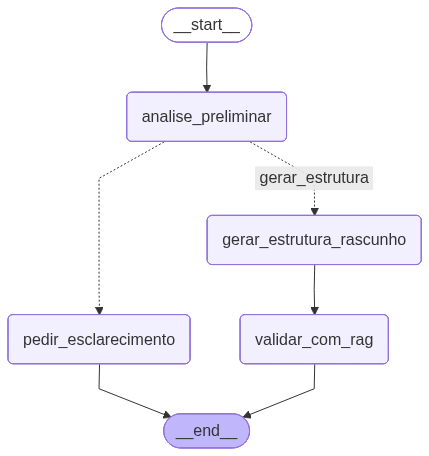

In [50]:
from IPython.display import Image, display

graph_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

In [51]:
testes_finais = [
    "Quero criar um IAT para medir a associação implícita entre flores e insetos com palavras agradáveis e desagradáveis.",

    "Gostaria de fazer uma pesquisa sobre política.",

    "Quero investigar se as pessoas associam doces com algo positivo.",

    "Vamos testar se programadores associam a linguagem Python com 'fácil' e a linguagem C++ com 'difícil'.",

    "A minha ideia é investigar a associação implícita entre os conceitos de 'Liberdade' e 'Segurança' com 'Risco' e 'Proteção'."
]

In [52]:
for i, teste in enumerate(testes_finais):
    print(f"--- INICIANDO TESTE {i+1} ---")
    print(f"Hipótese do Pesquisador: \"{teste}\"")

    resultado_final = grafo.invoke({"hipotese_inicial": teste})

    print("\n>>> SAÍDA FINAL DO AGENTE:")
    if "estrutura_final" in resultado_final and resultado_final["estrutura_final"]:
        print(json.dumps(resultado_final["estrutura_final"], indent=2, ensure_ascii=False))
    elif "mensagem_para_usuario" in resultado_final and resultado_final["mensagem_para_usuario"]:
        print(resultado_final["mensagem_para_usuario"])
    else:
        print("O agente não produziu uma saída esperada.")

    print("-----------------------------------------\n")


--- INICIANDO TESTE 1 ---
Hipótese do Pesquisador: "Quero criar um IAT para medir a associação implícita entre flores e insetos com palavras agradáveis e desagradáveis."
Executando Nó: Análise Preliminar
---EXECUTANDO DECISÃO: A hipótese está pronta?---
>>> RESULTADO: SIM. Rota: 'gerar_estrutura'
Executando nó de Geração da Estrutura IAT...
Executando nó de Validação e Enriquecimento com RAG...

>>> SAÍDA FINAL DO AGENTE:
{
  "hipotese_central": "Espera-se que \"Flores\" sejam implicitamente associadas a conceitos \"Agradáveis\", enquanto \"Insetos\" sejam implicitamente associados a conceitos \"Desagradáveis\".",
  "categorias_alvo": [
    {
      "nome": "Flores",
      "estimulos_sugeridos": [
        "Rosa",
        "Margarida",
        "Girassol",
        "Orquídea",
        "Tulipa",
        "Lírio",
        "Jasmim",
        "Violeta"
      ]
    },
    {
      "nome": "Insetos",
      "estimulos_sugeridos": [
        "Barata",
        "Mosca",
        "Aranha",
        "Mosquit